#### Visualize fits

Andressa Wille

andressaw2@gmail.com

14/01/2026

* This is a tutorial for visualization of a .fits file. We are using the F115W filter (NIRCam/JWST) of a jellyfish galaxy in Abell 2744.

Imports:

In [14]:
from astropy.io import fits
from astropy.io.fits import getdata
from astropy import wcs
from astropy.wcs import WCS
from astropy.io import ascii
from astropy.table import Table
from astropy.visualization import simple_norm
from astropy.table import Table, setdiff
from astropy import units as u
 
import pyregion

import os,glob
import os.path as path

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

Read fits and header:

In [3]:
ref_impath = '/home/andressa/doutorado/fits/F115W.fits'
assert path.exists(ref_impath), f"Path {ref_impath} could not be found"

with fits.open(ref_impath) as hdul:
    hdul.info()
    hdr_p = hdul["PRIMARY"].header
    hdr_d = hdul[1].header
    imdata = hdul[1].data

    w = wcs.WCS(hdr_d, hdul)

Filename: /home/andressa/doutorado/fits/F115W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 ImageHDU        42   (1615, 1615)   float32   


In [4]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 3.5875  -30.3966667  
CRPIX : 4402.5  615.5  
PC1_1 PC1_2  : -1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 5.5555555555555e-06  5.5555555555555e-06  
NAXIS : 1615  1615

View the galaxy and highlight a region:

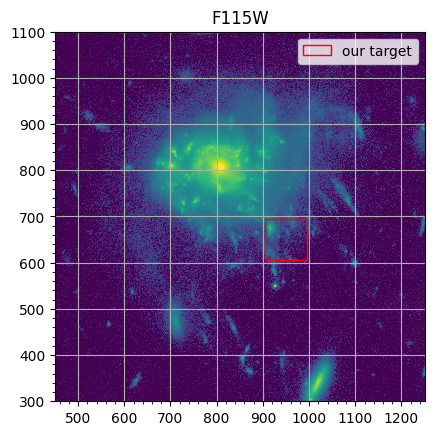

In [16]:
import matplotlib.patches as patches

plt.rcParams['font.size'] = 10

norm_mask = np.logical_or(np.isnan(imdata), imdata <= 0.)
norm1=simple_norm(imdata[~norm_mask], stretch="log", min_percent=20., max_percent=99.98)

fig, ax = plt.subplots(1,1)

im = ax.imshow(imdata, cmap="viridis", origin="lower", norm=norm1, 
               interpolation="nearest")
ax.set_xlim(450, 1250)
ax.set_ylim(300, 1100)
ax.set_title('F115W')

ax.xaxis.set_minor_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(20))

plt.grid(True)

plt.gca().add_patch(patches.Rectangle((905, 605), 90, 90,
                      edgecolor='red', fill=False, label='our target'))

plt.legend()

#fig.savefig('data.png')

Now with coordinates in RA and Dec, and a color bar:

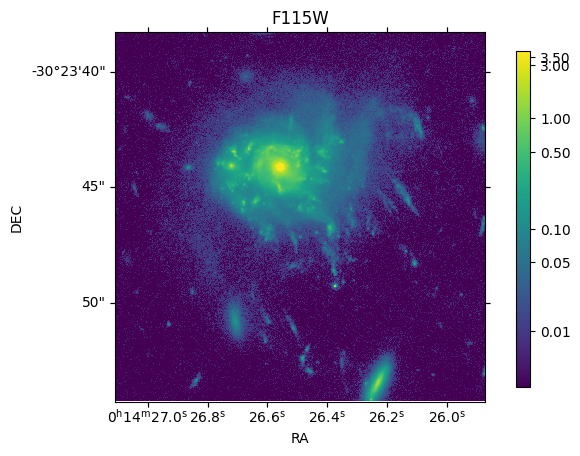

In [27]:
plt.rcParams['font.size'] = 10

norm_mask = np.logical_or(np.isnan(imdata), imdata <= 0.)
norm1=simple_norm(imdata[~norm_mask], stretch="log", min_percent=20., max_percent=99.98)

fig, ax = plt.subplots(1,1, subplot_kw={"projection": w})

im = ax.imshow(imdata, cmap="viridis", origin="lower", norm=norm1, 
               interpolation="nearest")

ax.set_xlim(450, 1250)
ax.set_ylim(300, 1100)
ax.set_title('F115W')

ra, dec = ax.coords["ra"], ax.coords["dec"]
ra.set_axislabel("RA")
dec.set_axislabel("DEC")

cax = fig.add_axes([0.85, 0.14, 0.022, 0.7])
cb  = plt.colorbar(im, cax=cax)
cb.set_ticks([0.01, 0.05, 0.1, 0.5, 1, 3, 3.5])

#fig.savefig('data-2.png')